In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# importimg the train dataset from the csv created in the  "notebook for cleaning" 
train = pd.read_csv("../datasets/train_feat_eng.csv")
test = pd.read_csv("../datasets/test_feat_eng.csv")

In [13]:
train.drop(columns="Unnamed: 0", inplace=True)

In [14]:
test.drop(columns="Unnamed: 0", inplace=True)

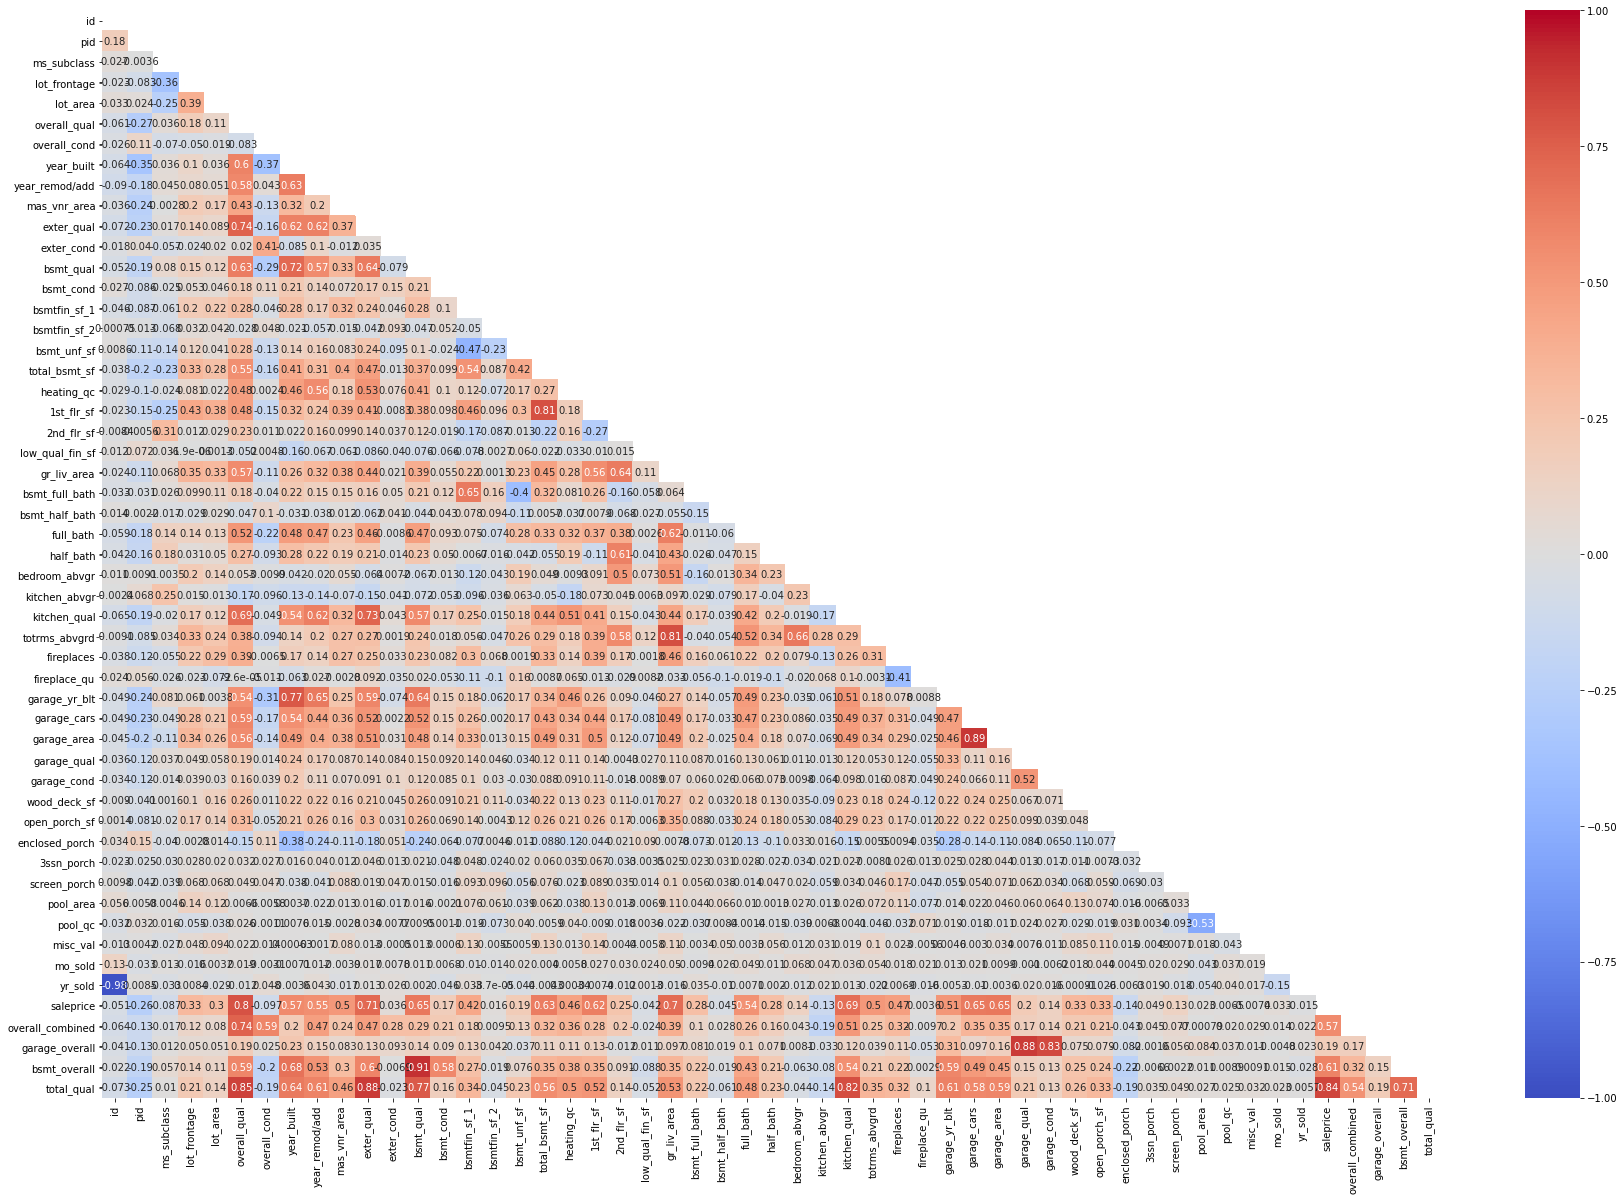

In [42]:
#Create a heatmap to show correlation between all of the features (from Visualization lesson)
corr = train.corr()
plt.figure(figsize=(30, 20))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, mask=mask)
plt.savefig("Full Heat Map.png");

In [16]:
# Create a features list with the features that most positively correlate with Sale Price (> .26)
features = ["lot_frontage", "lot_area", "overall_qual", "year_built", "year_remod/add", 
            "total_bsmt_sf", "total_qual", "1st_flr_sf", "gr_liv_area", "bsmt_full_bath",
            "full_bath", "half_bath", "totrms_abvgrd", "fireplaces", "garage_yr_blt", "garage_cars", 
            "garage_area", "wood_deck_sf", "open_porch_sf"]
# "Lot Frontage", "Lot Area", "BsmtFin SF 2", "Year Built", "Year Remod/Add", "Gr Liv Area", "Full Bath", "TotRms AbvGrd", "Garage Yr Blt",  "Open Porch SF" 


<Figure size 360x7200 with 0 Axes>

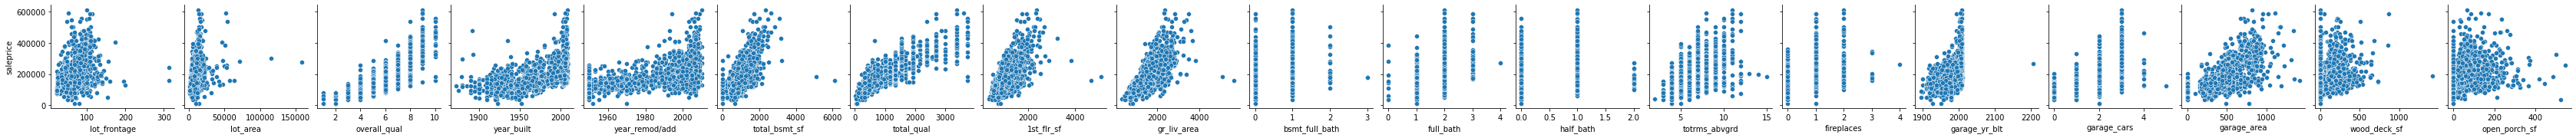

In [17]:
# Checking to see if any variable breaks the L assumption
plt.figure(figsize=(5,100))
sns.pairplot(data=train, x_vars=features, 
             y_vars = ["saleprice"], palette="coolwarm");

In [18]:
X = train[features]
y = train["saleprice"]

print('X: ', X.shape)
print('y: ', y.shape)

X:  (2051, 19)
y:  (2051,)


In [19]:
from sklearn.model_selection import train_test_split, cross_val_score

# # Split the training data into training and validation sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [21]:
cross_val_score(model, X, y).mean()

0.8377815142477033

In [22]:
model.fit(X, y)

LinearRegression()

In [23]:
model.score(X, y)

0.8504950842718424

In [24]:
cross_val_score(model, X, y).mean()

0.8377815142477033

In [25]:
X_test = test[features]

In [26]:
preds = model.predict(X_test)

In [37]:
len(list(preds))

878

In [27]:
test["saleprice"] = preds

In [38]:
test

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0    2658  902301120          190        RM          69.0      9142   Pave   
1    2718  905108090           90        RL          68.0      9662   Pave   
2    2414  528218130           60        RL          58.0     17104   Pave   
3    1989  902207150           30        RM          60.0      8520   Pave   
4     625  535105100           20        RL          68.0      9500   Pave   
..    ...        ...          ...       ...           ...       ...    ...   
873  1662  527377110           60        RL          80.0      8000   Pave   
874  1234  535126140           60        RL          90.0     14670   Pave   
875  1373  904100040           20        RL          55.0      8250   Pave   
876  1672  527425140           20        RL          60.0      9000   Pave   
877  1939  535327160           20        RL          70.0      8400   Pave   

    alley lot_shape land_contour  ... misc_feature misc_val mo_sold yr_sold  \
0    Grvl       Reg          Lvl  ...          NaN        0       4    2006   
1     NaN       IR1          Lvl  ...          NaN        0       8    2006   
2     NaN       IR1          Lvl  ...          NaN        0       9    2006   
3     NaN       Reg          Lvl  ...          NaN        0       7    2007   
4     NaN       IR1          Lvl  ...          NaN        0       7    2009   
..    ...       ...          ...  ...          ...      ...     ...     ...   
873   NaN       Reg          Lvl  ...          NaN        0      11    2007   
874   NaN       Reg          Lvl  ...          NaN        0       8    2008   
875   NaN       Reg          Lvl  ...          NaN        0       8    2008   
876   NaN       Reg          Lvl  ...          NaN        0       5    2007   
877   NaN       Reg          Lvl  ...          NaN        0       3    2007   

    sale_type overall_combined garage_overall bsmt_overall  total_qual  \
0         WD                48            1.0          6.0        72.0   
1         WD                20            9.0         12.0       756.0   
2         New               35            9.0         16.0       960.0   
3         WD                30            6.0          9.0       360.0   
4         WD                30            9.0         12.0       648.0   
..        ...              ...            ...          ...         ...   
873       WD                36            9.0          9.0       405.0   
874       WD                42            9.0          9.0       864.0   
875       WD                25            9.0          9.0       486.0   
876       WD                24            9.0          9.0       405.0   
877       WD                25            9.0          9.0       567.0   

         saleprice  
0    131603.887804  
1    193070.197337  
2    203734.982319  
3    117889.005076  
4    185289.169120  
..             ...  
873  179329.948508  
874  203416.920344  
875  126314.277404  
876  105400.592893  
877  143069.224859  

[878 rows x 85 columns]

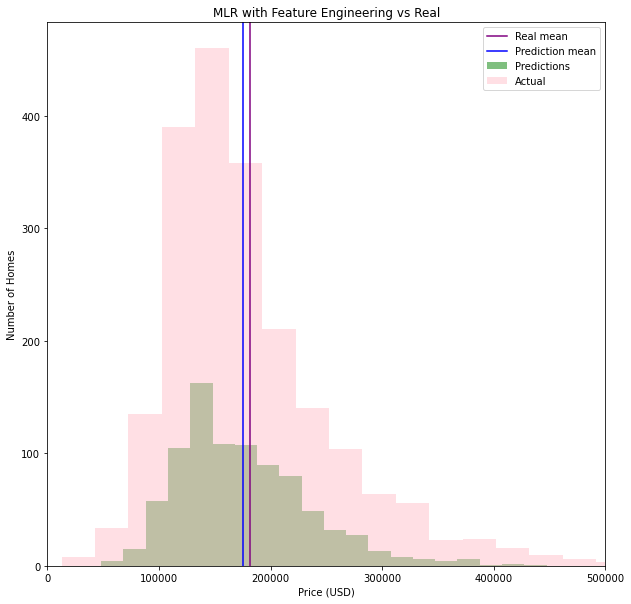

In [41]:
# plt.figure(figsize=(10,10))
# plt.hist(preds, color="green", bins=20)
# plt.xlim(0, 500_000)
# # plt.yscale("log")
# plt.axvline(y.mean(), color="purple")
# plt.show();

plt.figure(figsize=(10,10))
plt.hist(preds, color="green", alpha=0.5, bins=20, label="Predictions")
plt.hist(y, color="pink", alpha=0.5, bins=20, label="Actual")
plt.xlim(0, 500_000)
# plt.yscale("log")
plt.xlabel("Price (USD)")
plt.ylabel("Number of Homes")
plt.title("MLR with Feature Engineering vs Real")
plt.axvline(y.mean(), color="purple", label="Real mean")
plt.axvline(preds.mean(), color="blue", label="Prediction mean")
plt.legend()
plt.savefig("MLR with Feature Engineering");

In [40]:
y.mean() - preds.mean()

5922.812413928041

In [29]:
kaggle = test[["id", "saleprice"]]

In [31]:
kaggle.to_csv('../datasets/kaggle_mlr.csv', index=False)